___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

#### *ii. Load Dataset*

In [140]:
df = pd.read_csv("treetypes.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

🚨🚨🚨**Data Domain Knowledge** 🚨🚨🚨

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

**The wilderness areas are:**

 1.  Rawah Wilderness Area
 2.  Neota Wilderness Area
 3.  Comanche Peak Wilderness Area
 4.  Cache la Poudre Wilderness Area

**The soil types are:**

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [141]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [144]:
for column in df.columns:
    print(f"{column:40} column has {df[column].nunique():5}  unique values.")

Elevation                                column has  1983  unique values.
Aspect                                   column has   361  unique values.
Slope                                    column has    59  unique values.
Horizontal_Distance_To_Hydrology         column has  1294  unique values.
Vertical_Distance_To_Hydrology           column has   578  unique values.
Horizontal_Distance_To_Roadways          column has  6501  unique values.
Hillshade_9am                            column has   207  unique values.
Hillshade_Noon                           column has   165  unique values.
Hillshade_3pm                            column has   253  unique values.
Horizontal_Distance_To_Fire_Points       column has  6487  unique values.
Wilderness_Area_1                        column has     2  unique values.
Wilderness_Area_2                        column has     2  unique values.
Wilderness_Area_3                        column has     2  unique values.
Wilderness_Area_4                     

In [145]:
numeric_features = [] # numeric continous columns👈👈👈

for col in df.columns:
    if df[col].nunique() > 7 : numeric_features.append(col)
print(numeric_features)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [146]:
categorical_features = [ 'Wilderness_Area', 'Soil_Type' ] # categoric columns👈👈👈

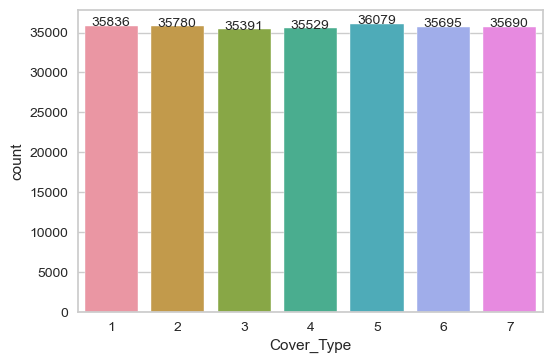

In [147]:
ax = sns.countplot(df.Cover_Type)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1));

**We see that the cover_type data, which is our target column, is distributed balanced.**

In [148]:
df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


<AxesSubplot:>

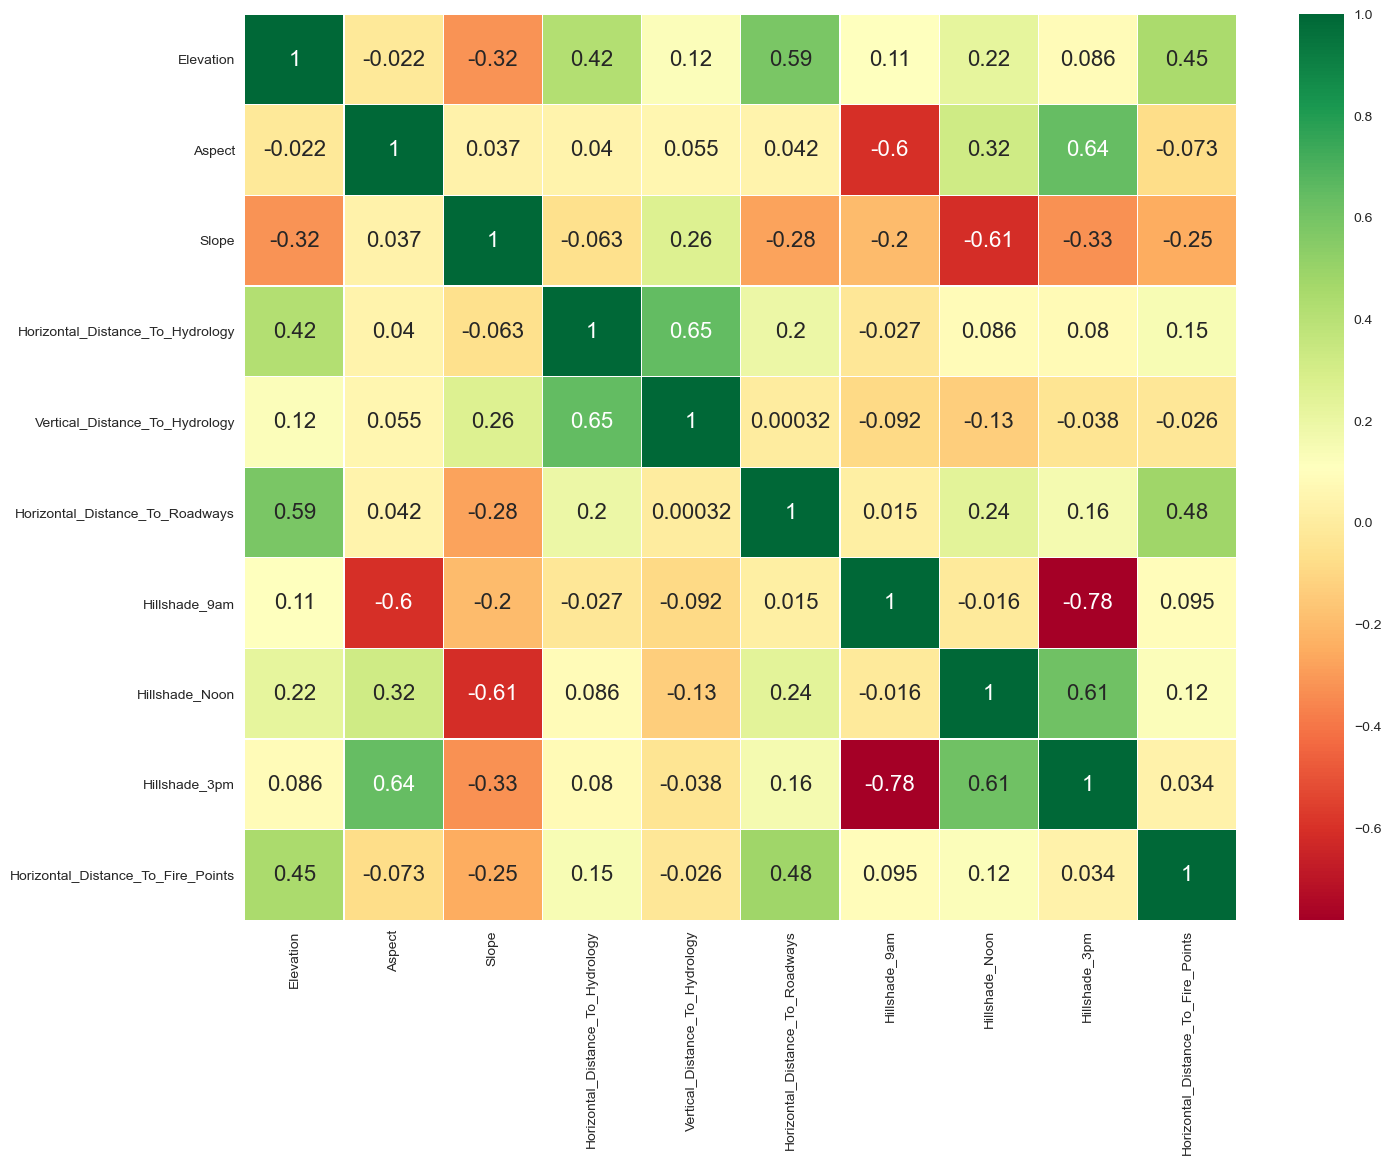

In [149]:
plt.figure(figsize = (16,12))
sns.heatmap(df[numeric_features].corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 16})

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [150]:
df.isnull().sum().any() # There are no feature with a null value.👈👈👈

False

In [151]:
df.duplicated().value_counts() # There are 2521 duplicated rows. Let's drop them.👈👈👈

False    247479
True       2521
dtype: int64

In [152]:
df[df.duplicated() == True]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
4668,2842,64,18,549,168,574,233,198,89,2410,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5475,2322,97,29,270,125,647,251,184,39,1655,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
7377,2259,24,3,0,0,751,217,232,151,607,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
7766,3253,74,10,199,26,4280,233,219,118,2405,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
9139,2130,41,5,0,0,958,220,227,142,649,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249902,2142,125,13,0,0,926,239,231,118,662,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249910,2178,125,26,159,78,780,253,208,64,163,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249928,2343,182,11,253,49,910,223,247,155,514,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249944,2299,135,7,388,37,85,233,237,134,322,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [153]:
df.drop_duplicates(inplace=True)

In [154]:
df.duplicated().value_counts() # We dropped the duplicated rows.👈👈👈

False    247479
dtype: int64

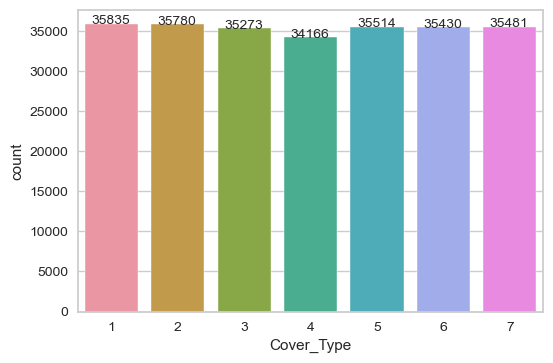

In [155]:
ax = sns.countplot(df.Cover_Type)             # let's look at the target again👈👈👈
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1));

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

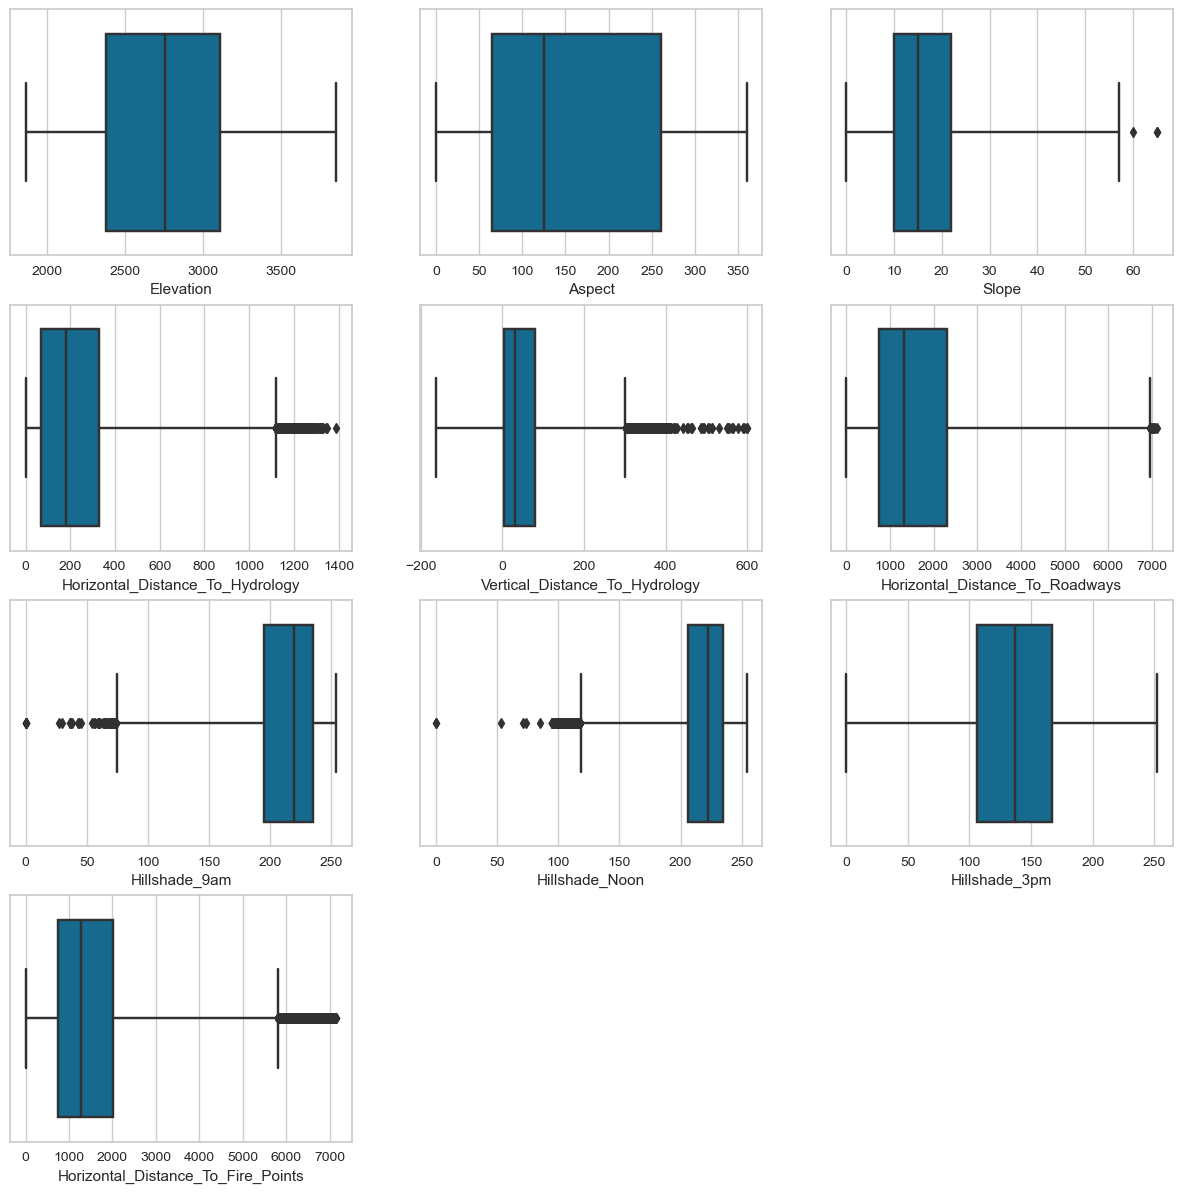

In [156]:
index = 0                          # let's check outliers numeric_features👈👈👈
plt.figure(figsize=(15,15))
for i in numeric_features:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=i, data=df, whis=3)

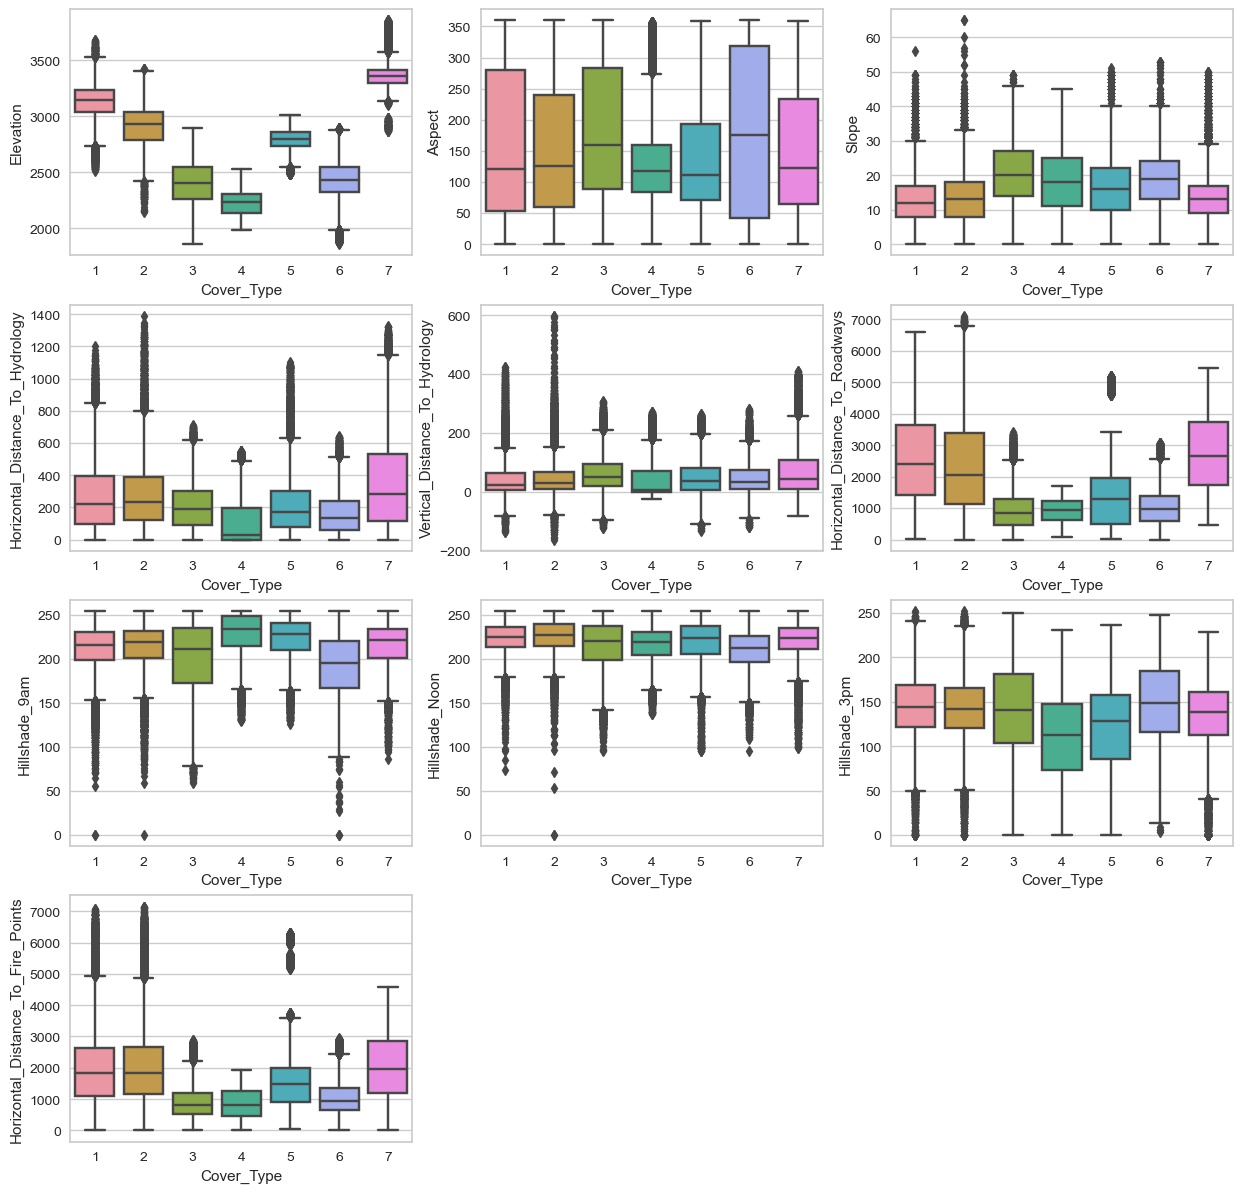

In [157]:
index = 0                          # let's check outliers numeric_features with respect to target (Cover_type) classes
plt.figure(figsize=(15,15))
for i in  numeric_features:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = i, x = "Cover_Type", data = df, whis=1.5)

In [158]:
def is_outlier(x, k):
    upper = np.quantile(x, 0.75)
    lower = np.quantile(x, 0.25)
    iqr = upper - lower
    max_treshold = upper + iqr * k
    min_treshold = lower - iqr * k
    if max_treshold > x.max():
        max_treshold = x.max()
    if min_treshold < x.min():
        min_treshold = x.min()
    print('-----',x.name,'-----')
    print('Upper Limit: ', max_treshold, '\n', 'Lower Limit: ', min_treshold, sep='')
    print('Number of outliers in the lower bound:', len(df[x<min_treshold]))
    print('Number of outliers in the upper bound:', len(df[x>max_treshold]))

In [159]:
for i in df[numeric_features]:
    is_outlier(df[i],3)

----- Elevation -----
Upper Limit: 3857
Lower Limit: 1859
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- Aspect -----
Upper Limit: 360
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- Slope -----
Upper Limit: 58.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 3
----- Horizontal_Distance_To_Hydrology -----
Upper Limit: 1119.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 762
----- Vertical_Distance_To_Hydrology -----
Upper Limit: 301.0
Lower Limit: -163
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 956
----- Horizontal_Distance_To_Roadways -----
Upper Limit: 6943.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 10
----- Hillshade_9am -----
Upper Limit: 254
Lower Limit: 75.0
Number of outliers in the lower bound: 78
N

### Deal with Outliers

#### *ii. Drop Outliers*

In [160]:
def remove_outlier(df_in, col_name,):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high),col_name]= np.nan

In [161]:
remove_outlier(df, "Slope")

In [162]:
df.Slope.isnull().sum()

3

In [163]:
df.shape

(247479, 55)

In [164]:
remove_outlier(df, "Horizontal_Distance_To_Hydrology")

In [165]:
df.Horizontal_Distance_To_Hydrology.isnull().sum()

762

In [166]:
remove_outlier(df, "Vertical_Distance_To_Hydrology")

In [167]:
df.Vertical_Distance_To_Hydrology.isnull().sum()

956

In [168]:
remove_outlier(df, "Horizontal_Distance_To_Roadways")

In [169]:
df.Horizontal_Distance_To_Roadways.isnull().sum()

10

In [170]:
remove_outlier(df, "Hillshade_9am")

In [171]:
df.Hillshade_9am.isnull().sum()

78

In [172]:
remove_outlier(df, "Hillshade_Noon")

In [173]:
df.Hillshade_Noon.isnull().sum()

194

In [174]:
remove_outlier(df, "Horizontal_Distance_To_Fire_Points")

In [175]:
df.Horizontal_Distance_To_Fire_Points.isnull().sum()

2334

In [176]:
df[numeric_features].isnull().sum()

Elevation                                0
Aspect                                   0
Slope                                    3
Horizontal_Distance_To_Hydrology       762
Vertical_Distance_To_Hydrology         956
Horizontal_Distance_To_Roadways         10
Hillshade_9am                           78
Hillshade_Noon                         194
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points    2334
dtype: int64

In [177]:
df.dropna(inplace=True)

✂️✂️✂️**we drop outliers**✂️✂️✂️

### Now, let's take a closer look at correlation of continuous columns.👀👀👀👀

<AxesSubplot:>

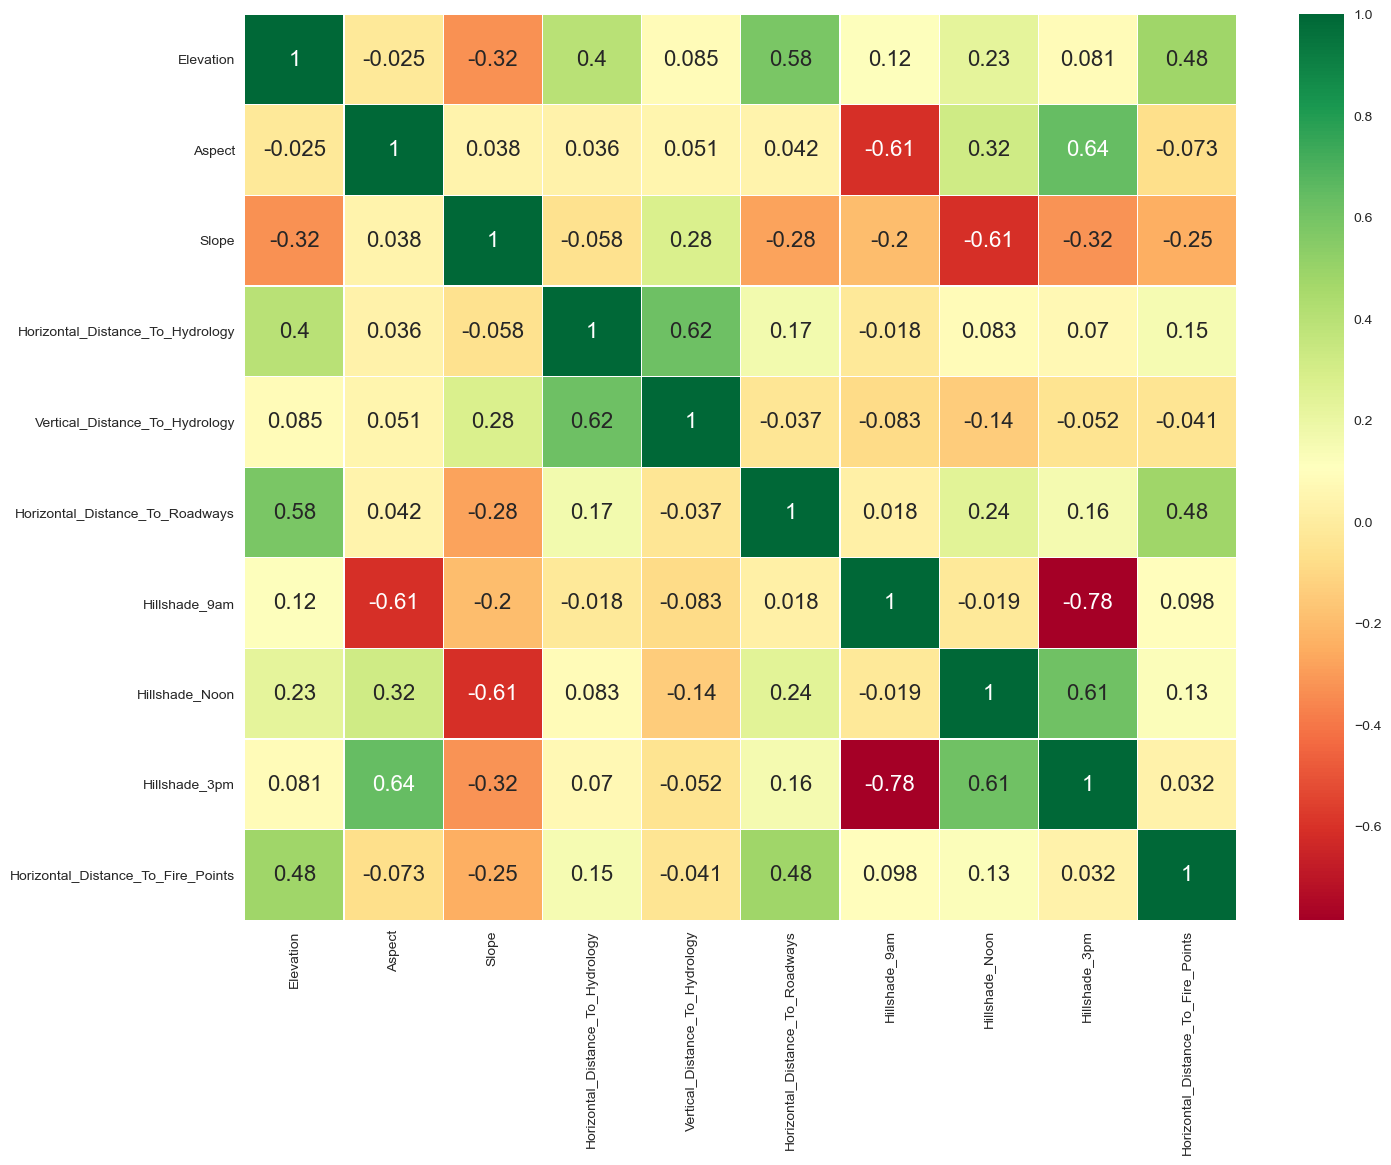

In [178]:
plt.figure(figsize = (16,12))
sns.heatmap(df[numeric_features].corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 16})

👆👆👆**The corr value has changed among some features.** 👆👆👆

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [179]:
df[numeric_features].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,50,51,...,249948,249949,249950,249951,249952,249953,249954,249955,249956,249957,249958,249959,249960,249961,249962,249963,249964,249965,249966,249967,249968,249970,249971,249972,249973,249974,249975,249976,249977,249978,249979,249980,249981,249982,249983,249984,249985,249986,249987,249988,249989,249990,249991,249992,249993,249994,249995,249996,249997,249998
Elevation,2696.000,3269.000,3283.000,2847.000,3248.000,2855.000,2410.000,2151.000,3255.000,2291.000,2574.000,2278.000,2773.000,2866.000,2323.000,3297.000,2094.000,3067.000,3031.000,2446.000,2488.000,3283.000,3004.000,3394.000,3373.000,2577.000,3220.000,2893.000,3321.000,3410.000,3236.000,3400.000,2084.000,2326.000,3128.000,2462.000,3388.000,2651.000,2951.000,2868.000,3115.000,2255.000,2932.000,2495.000,2673.000,2832.000,2356.000,3394.000,2451.000,2448.000,...,2759.000,2962.000,2673.000,3346.000,2879.000,3051.000,2665.000,2401.000,2922.000,2197.000,2165.000,2607.000,3285.000,3296.000,2788.000,2326.000,2292.000,3255.000,2346.000,2600.000,3330.000,3296.000,3302.000,2323.000,3178.000,3261.000,2777.000,3039.000,2322.000,1975.000,2730.000,3304.000,3311.000,2946.000,2497.000,3137.000,2802.000,2187.000,3148.000,2281.000,2647.000,3373.000,2131.000,2843.000,2714.000,2611.000,2112.000,2872.000,2336.000,2563.000
Aspect,123.000,110.000,322.000,89.000,93.000,162.000,331.000,337.000,357.000,32.000,112.000,199.000,38.000,341.000,21.000,338.000,128.000,142.000,274.000,152.000,106.000,358.000,127.000,68.000,332.000,53.000,158.000,116.000,322.000,307.000,179.000,60.000,113.000,21.000,81.000,349.000,74.000,326.000,100.000,336.000,258.000,334.000,209.000,52.000,14.000,149.000,100.000,84.000,354.000,299.000,...,50.000,331.000,53.000,180.000,47.000,342.000,88.000,7.000,59.000,147.000,140.000,136.000,211.000,163.000,149.000,1.000,320.000,174.000,277.000,152.000,114.000,292.000,3.000,215.000,16.000,311.000,309.000,142.000,23.000,159.000,197.000,327.000,279.000,4.000,317.000,43.000,47.000,101.000,56.000,176.000,345.000,93.000,20.000,198.000,127.000,111.000,339.000,90.000,57.000,181.000
Slope,10.000,19.000,18.000,31.000,12.000,5.000,21.000,30.000,19.000,7.000,10.000,19.000,13.000,11.000,8.000,15.000,16.000,24.000,25.000,13.000,12.000,23.000,9.000,27.000,32.000,8.000,37.000,10.000,28.000,7.000,14.000,14.000,14.000,36.000,6.000,10.000,12.000,27.000,18.000,15.000,15.000,15.000,12.000,7.000,15.000,12.000,28.000,16.000,18.000,16.000,...,7.000,23.000,19.000,14.000,13.000,9.000,14.000,19.000,11.000,4.000,30.000,16.000,7.000,28.000,16.000,27.000,20.000,13.000,22.000,4.000,19.000,7.000,13.000,14.000,6.000,5.000,7.000,27.000,34.000,20.000,19.000,12.000,25.000,16.000,27.000,3.000,14.000,15.000,19.000,11.000,20.000,12.000,18.000,9.000,11.000,14.000,39.000,31.000,5.000,10.000
Horizontal_Distance_To_Hydrology,212.000,134.000,346.000,270.000,507.000,85.000,124.000,67.000,339.000,0.000,60.000,196.000,291.000,295.000,86.000,0.000,30.000,603.000,311.000,57.000,30.000,718.000,134.000,117.000,274.000,422.000,137.000,224.000,162.000,473.000,150.000,11.000,0.000,333.000,365.000,275.000,604.000,134.000,210.000,219.000,659.000,407.000,30.000,44.000,42.000,433.000,84.000,408.000,67.000,336.000,...,175.000,466.000,212.000,1069.000,430.000,420.000,150.000,469.000,342.000,1.000,85.000,67.000,368.000,256.000,555.000,190.000,31.000,224.000,216.000,22.000,58.000,150.000,512.000,380.000,272.000,592.000,0.000,240.000,244.000,54.000,240.000,620.000,532.000,85.000,258.000,0.000,236.000,9.000,447.000,173.000,195.000,574.000,162.000,857.000,0.000,345.000,49.000,251.000,0.000,0.000
Vertical_Distance_To_Hydrology,48.000,40.000,104.000,175.000,118.000,4.000,66.000,31.000,120.000,0.000,-8.000,97.000,60.000,35.000,11.000,0.000,6.000,-9.000,36.000,6.000,-2.000,122.000,19.000,55.000,48.000,49.000,61.000,39.000,71.000,41.000,19.000,3.000,0.000,36.000,65.000,11.000,106.000,42.000,54.000,73.000,78.000,48.000,6.000

In [180]:
# 1. Produce Hypotenuse of horizantal and vertical distances.
  
Hypotenuse_Distance_Hydrology = np.hypot(df.Horizontal_Distance_To_Hydrology, df.Vertical_Distance_To_Hydrology)
df["Hypotenuse_Distance_Hydrology"] = pd.DataFrame(Hypotenuse_Distance_Hydrology)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Distance_Hydrology
0,2696,123,10.000,212.000,48.000,2245.000,237.000,231.000,123,2113.000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,217.366
1,3269,110,19.000,134.000,40.000,3734.000,249.000,216.000,88,3960.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,139.843
2,3283,322,18.000,346.000,104.000,4369.000,170.000,217.000,185,1330.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,361.292
3,2847,89,31.000,270.000,175.000,1320.000,248.000,173.000,29,889.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,321.753
4,3248,93,12.000,507.000,118.000,570.000,239.000,221.000,110,945.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,520.551


In [181]:
# 2.  Produce&transform an additional column which contains average of Horizantal Distances to Hydrology and Roadways.

df['Average_Distance_Hydrology_Roadways'] = df[['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']].mean(axis=1)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Distance_Hydrology,Average_Distance_Hydrology_Roadways
0,2696,123,10.000,212.000,48.000,2245.000,237.000,231.000,123,2113.000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,217.366,1228.500
1,3269,110,19.000,134.000,40.000,3734.000,249.000,216.000,88,3960.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,139.843,1934.000
2,3283,322,18.000,346.000,104.000,4369.000,170.000,217.000,185,1330.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,361.292,2357.500
3,2847,89,31.000,270.000,175.000,1320.000,248.000,173.000,29,889.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,321.753,795.000
4,3248,93,12.000,507.000,118.000,570.000,239.000,221.000,110,945.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,520.551,538.500


In [182]:
# 3 . Produce&transform an additional column which contains average of Elevation and Vertical_Distance_To_Hydrology columns.

df['Average_Distance_Elevation_VerHydrology'] = df[['Vertical_Distance_To_Hydrology', 'Elevation']].mean(axis=1)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Distance_Hydrology,Average_Distance_Hydrology_Roadways,Average_Distance_Elevation_VerHydrology
0,2696,123,10.000,212.000,48.000,2245.000,237.000,231.000,123,2113.000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,217.366,1228.500,1372.000
1,3269,110,19.000,134.000,40.000,3734.000,249.000,216.000,88,3960.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,139.843,1934.000,1654.500
2,3283,322,18.000,346.000,104.000,4369.000,170.000,217.000,185,1330.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,361.292,2357.500,1693.500
3,2847,89,31.000,270.000,175.000,1320.000,248.000,173.000,29,889.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,321.753,795.000,1511.000
4,3248,93,12.000,507.000,118.000,570.000,239.000,221.000,110,945.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,520.551,538.500,1683.000


In [183]:
 # 4 . no need to have Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology columns, we drop them.
    
df.drop (['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology'], inplace=True, axis=1)   

In [184]:
# reorder columns
df = df.reindex(list(df.columns[:8])+["Hypotenuse_Distance_Hydrology","Average_Distance_Hydrology_Roadways","Average_Distance_Elevation_VerHydrology"]+list(df.columns[8:-3]), axis=1)

In [185]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Hypotenuse_Distance_Hydrology',
       'Average_Distance_Hydrology_Roadways',
       'Average_Distance_Elevation_VerHydrology', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soi

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from svm_margin_plot import plot_svm_boundary # plot_svm_boundary(model,X,y)

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [187]:
X = df.drop(["Cover_Type"],axis=1) # Features
y = df["Cover_Type"] # Target

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [189]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [191]:
modelSVC = LinearSVC(class_weight = "balanced",random_state=101)

In [192]:
modelSVC.fit(X_train_scaled, y_train)

LinearSVC(class_weight='balanced', random_state=101)

In [193]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [194]:
y_pred = modelSVC.predict(X_test)

SVC_acc = accuracy_score(y_test, y_pred)
SVC_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(modelSVC, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[6918 1549   10    0  610  105 1355]
 [2647 4907  232    8 1969  440   78]
 [   0   38 5502 1482  691 2844    0]
 [   0    0  563 9318    0  369    0]
 [ 308 1458  791    0 7358  535    0]
 [   0  401 1794 1200 1087 6137    0]
 [1050    8   39    0   50    0 9150]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.64     10547
           2       0.59      0.48      0.53     10281
           3       0.62      0.52      0.56     10557
           4       0.78      0.91      0.84     10250
           5       0.63      0.70      0.66     10450
           6       0.59      0.58      0.58     10619
           7       0.86      0.89      0.88     10297

    accuracy                           0.68     73001
   macro avg       0.67      0.68      0.67     73001
weighted avg       0.67      0.68      0.67     73001


Train_Set
[[16152  3577    23     0  1469   243  3144]
 [ 6104 11350   575    14  4573  1181   191]
 [    0    87 12773  3477 

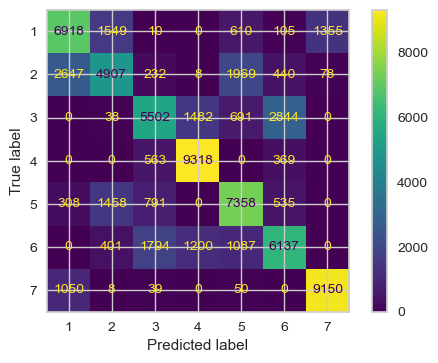

In [195]:
plot_confusion_matrix(modelSVC,X_test_scaled,y_test);

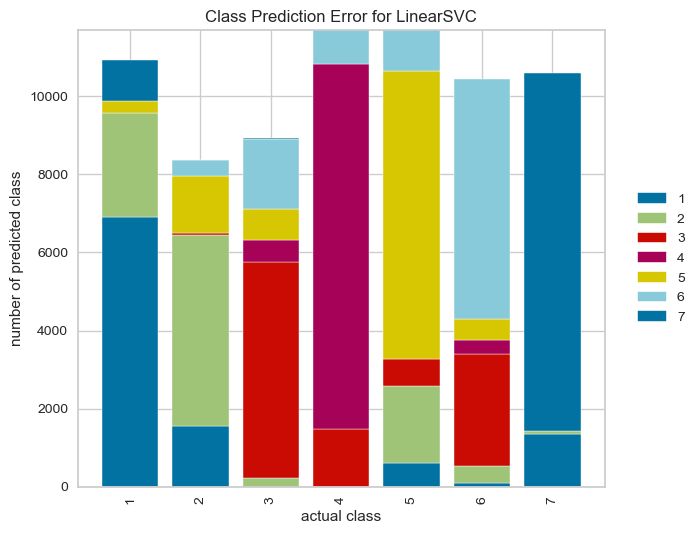

In [127]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(modelSVC)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

## Grid Search with LinearSVC

In [112]:
linearsvc = LinearSVC()

param_grid = { 'penalty':['l2','l1'],
                'C':[0.01,0.1,1,10],
               'random_state': [101],}
gridlinearSVC = GridSearchCV(linearsvc, param_grid, cv=5)

In [113]:
gridlinearSVC.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', 'l1'],
                         'random_state': [101]})

In [116]:
gridlinearSVC.best_params_

{'C': 10, 'penalty': 'l2', 'random_state': 101}

In [117]:
linearsvc = LinearSVC(C=10, random_state=101)
linearsvc.fit(X_train_scaled, y_train)
eval_metric(linearsvc, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[6983 1493   10    0  609  106 1346]
 [2693 4858  232    9 1963  450   76]
 [   0   39 5535 1461  688 2834    0]
 [   0    0  587 9283    0  380    0]
 [ 318 1433  792    0 7365  542    0]
 [   0  380 1821 1185 1066 6167    0]
 [1052    6   39    0   51    0 9149]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.65     10547
           2       0.59      0.47      0.53     10281
           3       0.61      0.52      0.57     10557
           4       0.78      0.91      0.84     10250
           5       0.63      0.70      0.66     10450
           6       0.59      0.58      0.58     10619
           7       0.87      0.89      0.88     10297

    accuracy                           0.68     73001
   macro avg       0.67      0.68      0.67     73001
weighted avg       0.67      0.68      0.67     73001


Train_Set
[[16305  3452    23     0  1465   246  3117]
 [ 6240 11184   573    14  4568  1220   189]
 [    0    87 12850  3415 

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [196]:
# don't scale beacuse not necessary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101) 

In [197]:
DT_model = DecisionTreeClassifier(random_state=101)

In [198]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [199]:
y_pred = DT_model.predict(X_test)

#### Model Performance on Classification Tasks

In [200]:
DT_acc = accuracy_score(y_test, y_pred)
DT_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 8927  1312     5     0    55    14   234]
 [ 1276  8457   123     0   273   132    20]
 [    5    95  9881    94    46   436     0]
 [    0     0    58 10160     0    32     0]
 [   26   117    41     0 10246    20     0]
 [    4    79   350    57    17 10112     0]
 [  156    17     0     0     1     0 10123]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.85     10547
           2       0.84      0.82      0.83     10281
           3       0.94      0.94      0.94     10557
           4       0.99      0.99      0.99     10250
           5       0.96      0.98      0.97     10450
           6       0.94      0.95      0.95     10619
           7       0.98      0.98      0.98     10297

    accuracy                           0.93     73001
   macro avg       0.93      0.93      0.93     73001
weighted avg       0.93      0.93      0.93     73001


Train_Set
[[24608     0     0     0     0     0     0]
 [    0 23988     0   

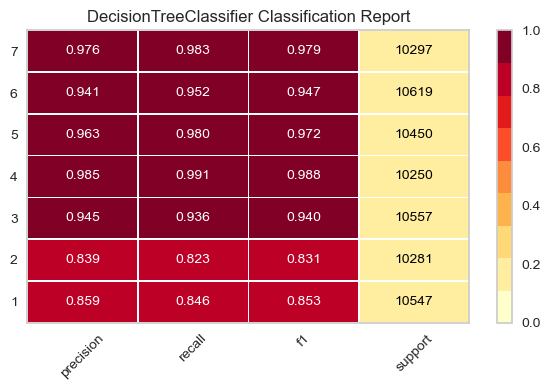

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [149]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(DT_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

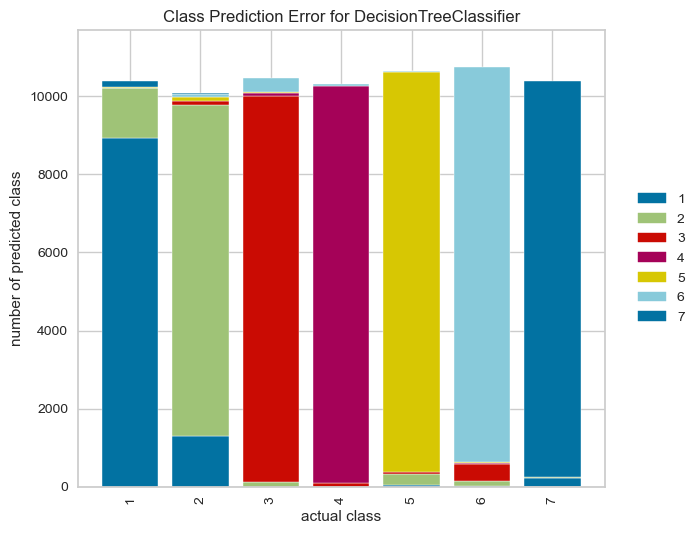

In [128]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

__Cross Validate__

In [78]:
model = DecisionTreeClassifier(random_state=101)     

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.918,0.027,0.928,0.928,0.928,0.928
2,3.019,0.031,0.927,0.927,0.927,0.927
3,3.162,0.029,0.926,0.926,0.926,0.926
4,2.836,0.026,0.926,0.926,0.926,0.926
5,2.918,0.028,0.928,0.928,0.928,0.928
6,2.971,0.032,0.924,0.924,0.924,0.924
7,2.755,0.026,0.923,0.923,0.923,0.923
8,2.961,0.029,0.931,0.931,0.931,0.931
9,3.128,0.030,0.924,0.924,0.924,0.924
10,3.099,0.033,0.926,0.926,0.926,0.926


In [79]:
df_scores.mean()[2:]

test_accuracy          0.926
test_precision_micro   0.926
test_recall_micro      0.926
test_f1_micro          0.926
dtype: float64

__Feature Importance__

In [80]:
DT_model.feature_importances_

array([4.00400170e-01, 2.69044763e-02, 1.57139925e-02, 7.80853671e-02,
       2.86874059e-02, 2.70360192e-02, 2.04421295e-02, 9.84247501e-02,
       6.63037637e-02, 4.38084361e-02, 3.50503712e-02, 1.25962198e-02,
       1.21501941e-03, 8.71053486e-03, 3.62356299e-03, 1.10053021e-03,
       7.53229929e-03, 1.89180964e-02, 1.71470532e-02, 3.41813921e-04,
       2.63412363e-03, 0.00000000e+00, 0.00000000e+00, 2.81767529e-05,
       3.20396694e-02, 4.11782380e-03, 5.51819604e-03, 2.35749507e-03,
       2.71874028e-04, 0.00000000e+00, 3.13017661e-04, 4.95323984e-04,
       0.00000000e+00, 2.69717018e-04, 1.30142800e-03, 9.13271457e-06,
       2.92621341e-03, 2.65253750e-03, 2.26266465e-03, 2.01549563e-05,
       7.77628250e-05, 6.98967919e-05, 3.24208992e-04, 7.15550394e-03,
       2.34381351e-03, 3.43146284e-03, 3.43126802e-03, 2.69952067e-03,
       3.65431132e-04, 3.53866794e-04, 2.54239471e-05, 0.00000000e+00,
       3.65217622e-03, 5.80699742e-03, 1.00310665e-03])

In [81]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Soil_Type_37,0.000
Soil_Type_18,0.000
Soil_Type_8,0.000
Soil_Type_15,0.000
Soil_Type_7,0.000
Soil_Type_21,0.000
Soil_Type_25,0.000
Soil_Type_36,0.000
Soil_Type_9,0.000
Soil_Type_27,0.000


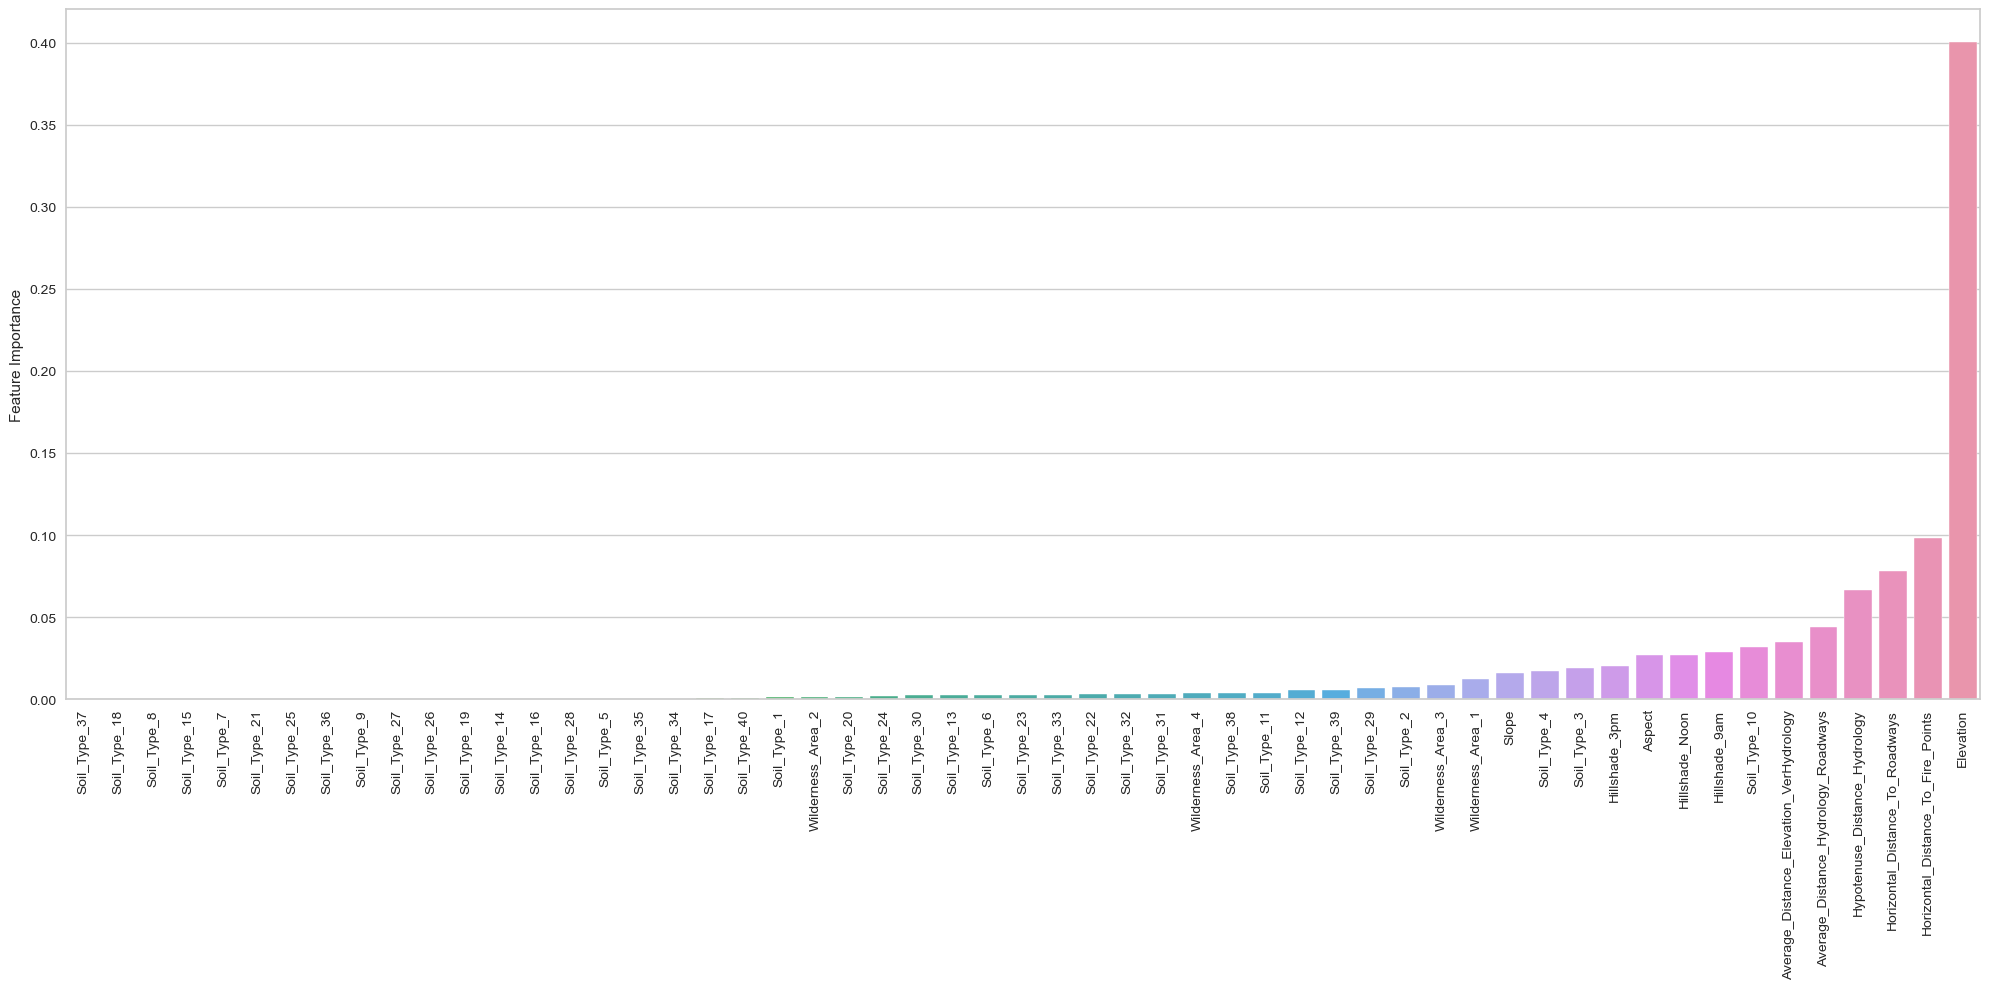

In [84]:
plt.figure(figsize=(20,10))
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

__Drop most important feature__

In [85]:
X2 = X.drop(columns = ["Elevation"]) 

In [89]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=101)

In [90]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [91]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [92]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[ 8861  1351     5     0    72    10   248]
 [ 1421  8191   144     1   340   135    49]
 [    9   132  9787   108    39   482     0]
 [    0     0    55 10149     0    46     0]
 [   36   133    26     0 10240    15     0]
 [    9   114   401    66    22 10007     0]
 [  159    22     0     0     1     0 10115]]
              precision    recall  f1-score   support

           1       0.84      0.84      0.84     10547
           2       0.82      0.80      0.81     10281
           3       0.94      0.93      0.93     10557
           4       0.98      0.99      0.99     10250
           5       0.96      0.98      0.97     10450
           6       0.94      0.94      0.94     10619
           7       0.97      0.98      0.98     10297

    accuracy                           0.92     73001
   macro avg       0.92      0.92      0.92     73001
weighted avg       0.92      0.92      0.92     73001


Train_Set
[[24608     0     0     0     0     0     0]
 [    0 23988     0   

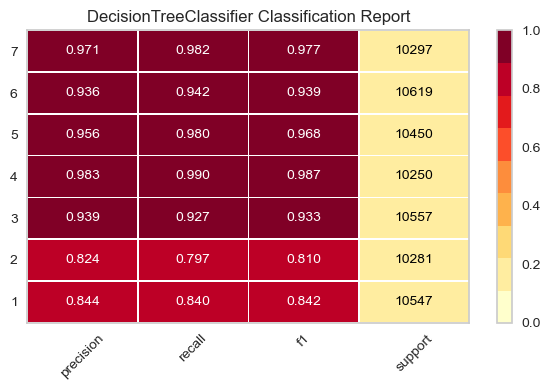

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [148]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(DT2_model, support=True)
visualizer.fit(X_train2, y_train2)        
visualizer.score(X_test2, y_test2)        
visualizer.show()

In [93]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.920,0.028,0.921,0.921,0.921,0.921
2,3.021,0.028,0.919,0.919,0.919,0.919
3,2.719,0.034,0.916,0.916,0.916,0.916
4,3.107,0.029,0.920,0.920,0.920,0.920
5,2.829,0.032,0.916,0.916,0.916,0.916
6,2.639,0.026,0.922,0.922,0.922,0.922
7,2.934,0.035,0.919,0.919,0.919,0.919
8,2.776,0.026,0.921,0.921,0.921,0.921
9,2.762,0.028,0.918,0.918,0.918,0.918
10,2.651,0.027,0.916,0.916,0.916,0.916


In [94]:
df_scores.mean()[2:]

test_accuracy          0.919
test_precision_micro   0.919
test_recall_micro      0.919
test_f1_micro          0.919
dtype: float64

__Grid Search__

In [95]:
model = DecisionTreeClassifier(random_state=101)

In [120]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 4, 7],    
              "max_depth": [None,2,3, 4, 5],                              
              "min_samples_leaf": [1, 3, 5, 7],
              "min_samples_split": [2, 3, 6, 7, 9]}

In [121]:
dt_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [122]:
dt_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 4, 7],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 3, 6, 7, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [123]:
dt_grid_model.best_params_  

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

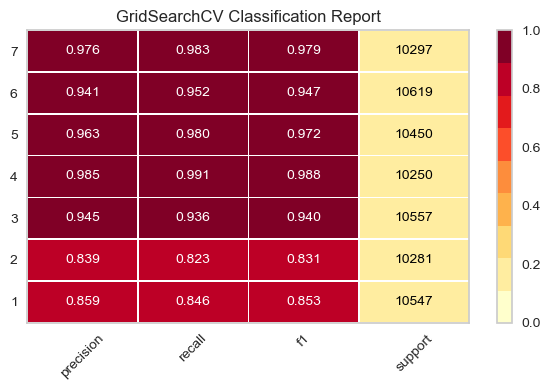

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [132]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dt_grid_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [124]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 8927  1312     5     0    55    14   234]
 [ 1276  8457   123     0   273   132    20]
 [    5    95  9881    94    46   436     0]
 [    0     0    58 10160     0    32     0]
 [   26   117    41     0 10246    20     0]
 [    4    79   350    57    17 10112     0]
 [  156    17     0     0     1     0 10123]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.85     10547
           2       0.84      0.82      0.83     10281
           3       0.94      0.94      0.94     10557
           4       0.99      0.99      0.99     10250
           5       0.96      0.98      0.97     10450
           6       0.94      0.95      0.95     10619
           7       0.98      0.98      0.98     10297

    accuracy                           0.93     73001
   macro avg       0.93      0.93      0.93     73001
weighted avg       0.93      0.93      0.93     73001


Train_Set
[[24608     0     0     0     0     0     0]
 [    0 23988     0   

__ROC/AUC__

In [214]:
from yellowbrick.classifier import ROCAUC

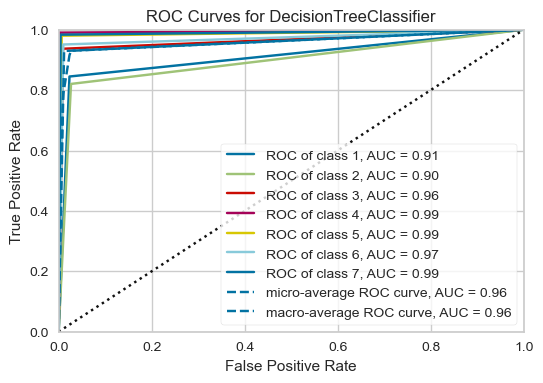

In [127]:
dt_model = DecisionTreeClassifier()
visualizer = ROCAUC(dt_model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show();    

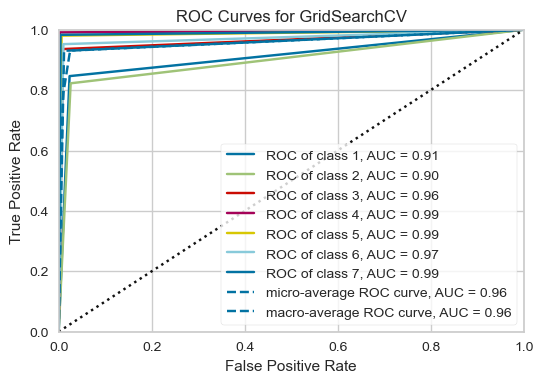

In [128]:
visualizer = ROCAUC(dt_grid_model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show(); 

__it seems that the basic DT model gives us the best scores.__

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [201]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [202]:
y_pred = rf_model.predict(X_test)

RF_acc = accuracy_score(y_test, y_pred)
RF_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9628   733     3     0    41     6   136]
 [  756  9082   120     0   182   124    17]
 [    0    17 10250    81    11   198     0]
 [    0     0     5 10243     0     2     0]
 [    0    15     9     0 10424     2     0]
 [    0     7    95    38     2 10477     0]
 [   33     2     0     0     1     0 10261]]
              precision    recall  f1-score   support

           1       0.92      0.91      0.92     10547
           2       0.92      0.88      0.90     10281
           3       0.98      0.97      0.97     10557
           4       0.99      1.00      0.99     10250
           5       0.98      1.00      0.99     10450
           6       0.97      0.99      0.98     10619
           7       0.99      1.00      0.99     10297

    accuracy                           0.96     73001
   macro avg       0.96      0.96      0.96     73001
weighted avg       0.96      0.96      0.96     73001


Train_Set
[[24607     1     0     0     0     0     0]
 [    0 23988     0   

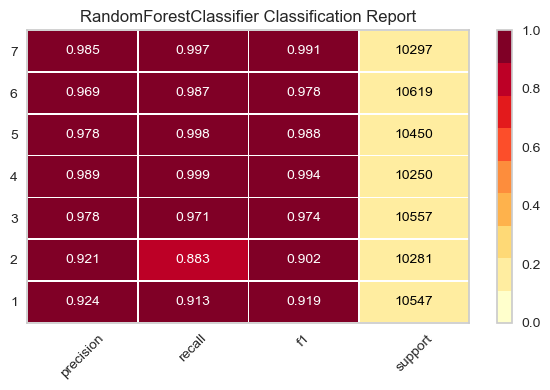

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [135]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

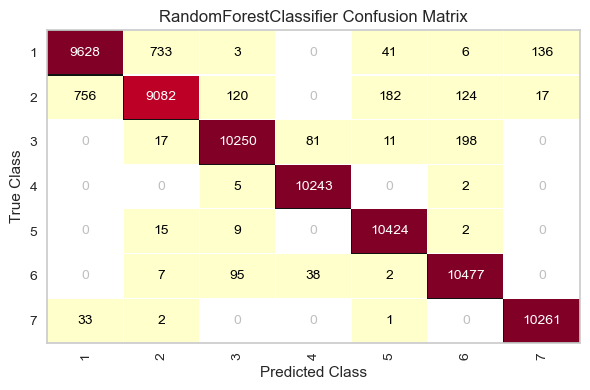

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [140]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

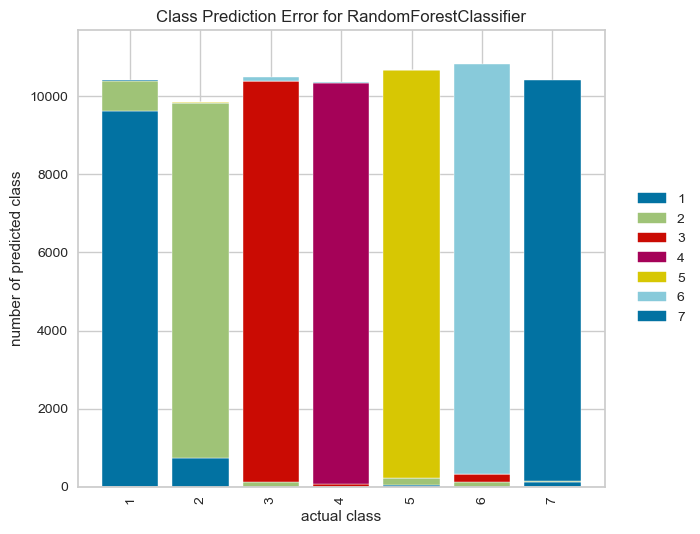

In [131]:
visualizer = ClassPredictionError(rf_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

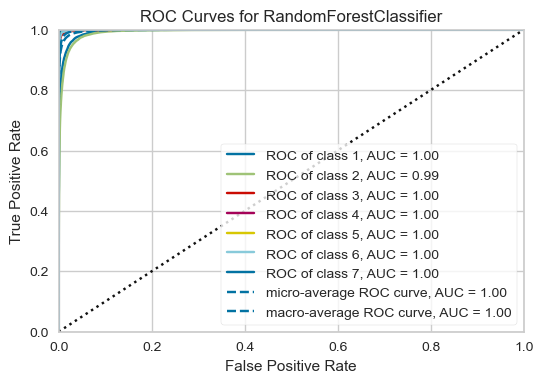

In [134]:
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show(); 

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [219]:
from xgboost import XGBClassifier

In [220]:
xgb = XGBClassifier(random_state=101 ,eval_metric='mlogloss').fit(X_train, y_train)

In [221]:
y_pred = rf_model.predict(X_test)

XGB_acc = accuracy_score(y_test, y_pred)
XGB_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[ 8994  1138     2     0    95    12   306]
 [ 1405  8090   141     0   446   180    19]
 [    0    18  9521   105    57   856     0]
 [    0     0    16 10218     0    16     0]
 [    0    55    37     0 10342    16     0]
 [    4    30   369    57    30 10129     0]
 [   59     3     0     0     1     0 10234]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.86     10547
           2       0.87      0.79      0.82     10281
           3       0.94      0.90      0.92     10557
           4       0.98      1.00      0.99     10250
           5       0.94      0.99      0.97     10450
           6       0.90      0.95      0.93     10619
           7       0.97      0.99      0.98     10297

    accuracy                           0.93     73001
   macro avg       0.92      0.93      0.92     73001
weighted avg       0.92      0.93      0.92     73001


Train_Set
[[21949  2001     3     0   186    16   453]
 [ 2635 20009   247   

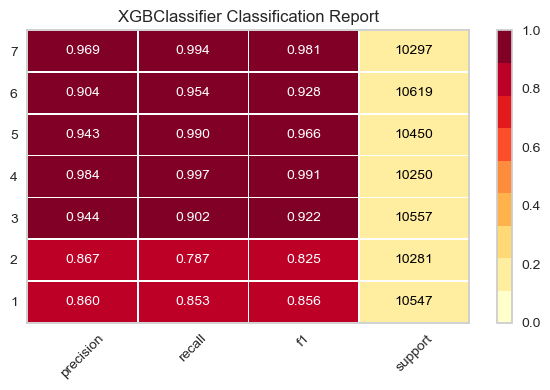

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [210]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(xgb, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

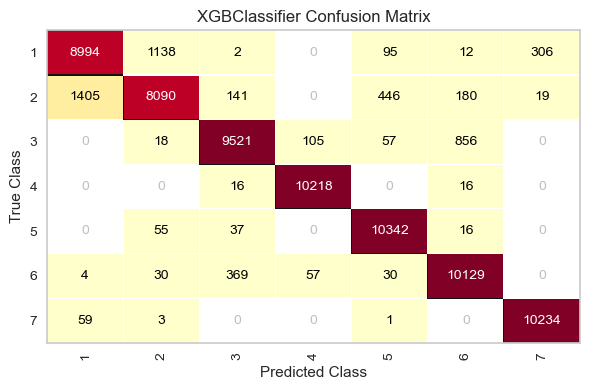

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [211]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

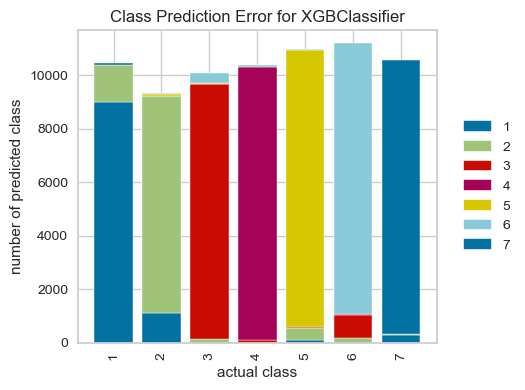

In [212]:
visualizer = ClassPredictionError(xgb)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

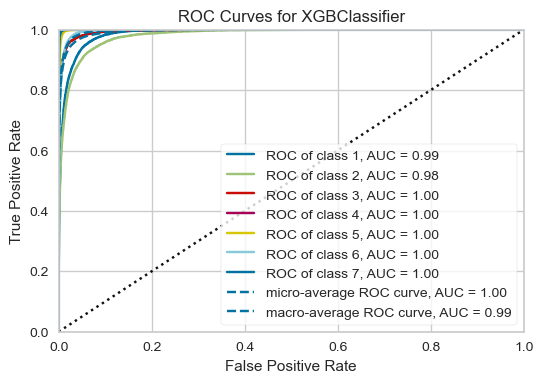

In [215]:
visualizer = ROCAUC(xgb)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show(); 

 ### Compare The Models 🏁🏁🏁🏁

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

## Accuracy  and F1 Score Comparison

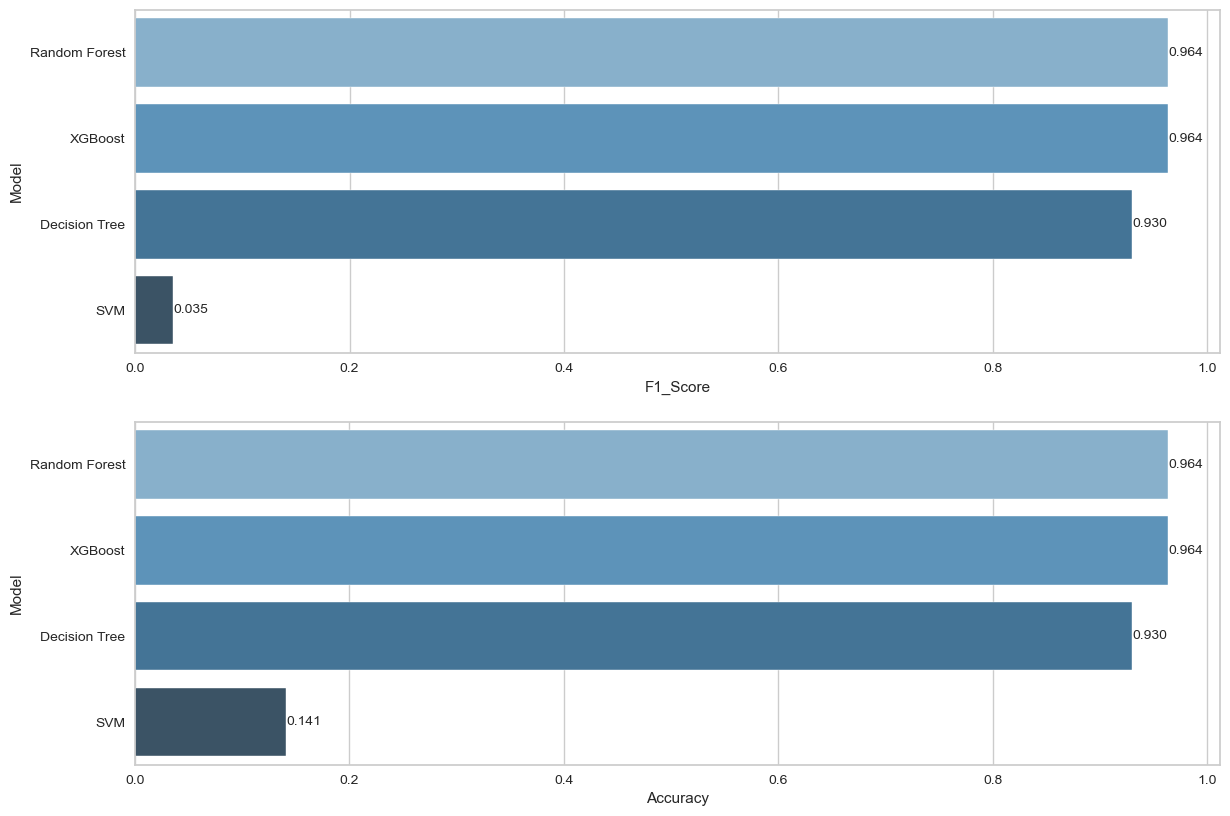

In [224]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest", "XGBoost"],
                        "F1_Score": [SVC_f1, DT_f1, RF_f1, XGB_f1],
                        "Accuracy": [SVC_acc, DT_acc, RF_acc, XGB_acc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(212)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

# Modeling and Prediction

In [227]:
import pickle   

In [225]:
# we select random Forest Model 👍👍👍
final_model = RandomForestClassifier(class_weight="balanced", random_state=101).fit(X, y) 

In [228]:
pickle.dump(final_model, open("final_model_tree_types", 'wb'))

In [229]:
my_dict = {"Elevation": 2800,
           "Aspect": 180,
           "Slope": 22,
           "Horizontal_Distance_To_Hydrology": 120,
           "Vertical_Distance_To_Hydrology": 45,
           "Horizontal_Distance_To_Roadways": 2600,
           "Hillshade_9am": 201,
           "Hillshade_Noon": 262,
           "Hillshade_3pm": 120,
           "Horizontal_Distance_To_Fire_Points": 3200,
           "Wilderness": "Area4",
           "Soil": "Type20"
          }

In [230]:
my_dict = pd.DataFrame([my_dict])
my_dict

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil
0,2800,180,22,120,45,2600,201,262,120,3200,Area4,Type20


In [231]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Hypotenuse_Distance_Hydrology,Average_Distance_Hydrology_Roadways,Average_Distance_Elevation_VerHydrology,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2800,180,22,2600,201,262,120,3200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [232]:
final_model.predict(my_dict)

array([2], dtype=int64)

#                            👏👏👏 THE END OF PROJECT TREE TYPES PREDICTION👏👏👏

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___